In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.color import rgb2gray
from skimage import feature, color

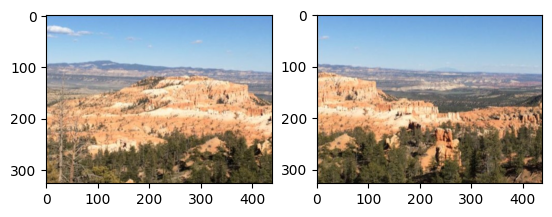

In [3]:
image = cv2.imread('part1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('part2.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

figure = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.show()

### Step 1 : Corner detection 
https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.corner_harris

Use feature points that you can detect using the Harris corner detection. Describe every key-point by extracting fixed-size patches around it (try different sizes and report a short sensitivity analysis of the final result)

Key points typically possess some characteristic properties, such as:

- Distinctiveness: Key points should have unique characteristics that make them stand out from their surroundings. This distinctiveness enables them to be reliably matched across different images.
- Repeatability: Key points should be consistently detected in different instances of the same object or scene, even when subjected to various transformations like rotation, scale changes, or changes in viewpoint.
- Locality: Key points should capture local structures or features within an image, such as corners, edges, or blobs. They are usually detected within small regions of an image rather than spanning the entire image.
- Invariance: Key points should ideally be invariant to certain transformations such as changes in scale, rotation, and illumination. Invariance ensures that the same key points can be detected and matched across different instances of the same object or scene.
Key points are often represented by their spatial coordinates (x, y) and may include additional information such as scale, orientation, and descriptors that encode local image information around the key point. These descriptors are used for matching key points across different images or for other tasks such as object recognition or image stitching


In [4]:
def detect_corner(image,k = 0.02,sigma = 1,min_distance = 15):
    # Convert the image to grayscale
    image_gray = color.rgb2gray(image)

    # Apply Harris corner detection
    corner_response = feature.corner_harris(image_gray, k = k,sigma=sigma)

    # Find corners using non-maximum suppression
    coords = feature.corner_peaks(corner_response, min_distance= min_distance)

    # Plot the image and detected corners
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray')
    plt.plot(coords[:, 1], coords[:, 0], 'r+', markersize=10)
    plt.axis('off')
    plt.show()
    return image_gray, coords,corner_response

In [5]:
def find_key_points(image_gray,coords,corner_response,patch_size = 25) : 

    # Threshold the corner response to get keypoints
    threshold = 0.01 * corner_response.max()
    keypoints = []
    for y in range(corner_response.shape[0]):
        for x in range(corner_response.shape[1]):
            if corner_response[y, x] > threshold:
                keypoints.append(cv2.KeyPoint(x, y, 1))  # 1 is the size of the keypoint
    print(f'# of keypoints : {len(keypoints)}')
    
    keypoint_patches = []
    for y, x in coords:
        y_min, y_max = max(0, y - patch_size // 2), min(image_gray.shape[0], y + patch_size // 2)
        x_min, x_max = max(0, x - patch_size // 2), min(image_gray.shape[1], x + patch_size // 2)
        patch = image_gray[y_min:y_max, x_min:x_max]
        keypoint_patches.append(patch)
    
    print(f'# of keypoint patches : {len(keypoint_patches)}')

    # Plot the image and keypoint patches
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.plot(coords[:, 1], coords[:, 0], 'r+', markersize=10)
    plt.title('Detected Corners')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    for i, patch in enumerate(keypoint_patches[:10]):  # Plot only first 10 patches
        plt.subplot(2, 5, i+1)
        plt.imshow(patch, cmap='gray')
        plt.title(f'Patch {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    return keypoints

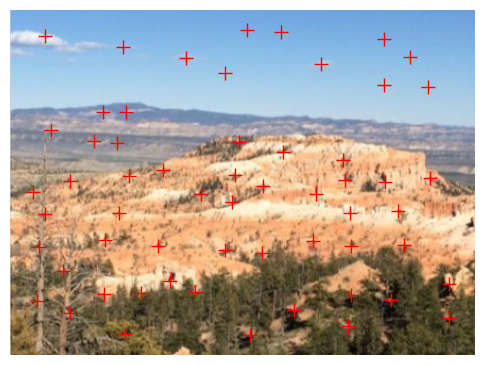

# of keypoints : 8936
# of keypoint patches : 58


C:\Users\elif.yozkan\AppData\Local\Temp\ipykernel_7712\438186132.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i+1)


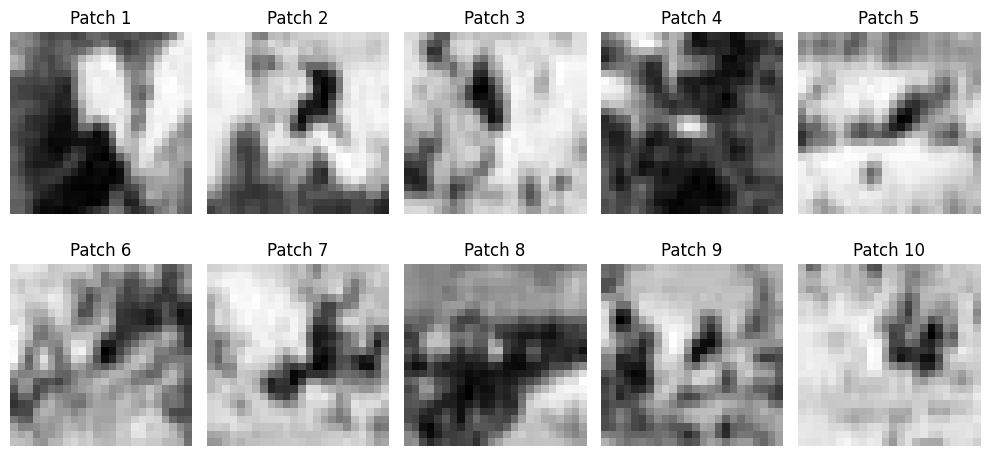

In [6]:
image_gray,coords,corner_response = detect_corner(image, min_distance=18)
keypoints = find_key_points(image_gray,coords,corner_response)

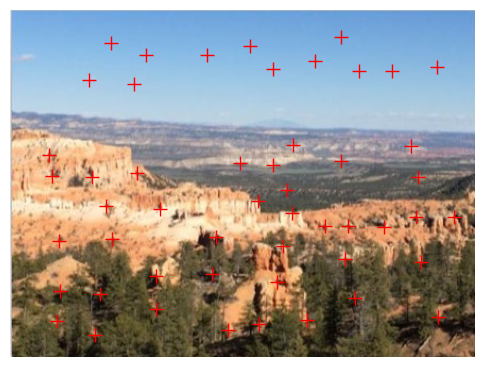

# of keypoints : 5676
# of keypoint patches : 51


C:\Users\elif.yozkan\AppData\Local\Temp\ipykernel_7712\438186132.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i+1)


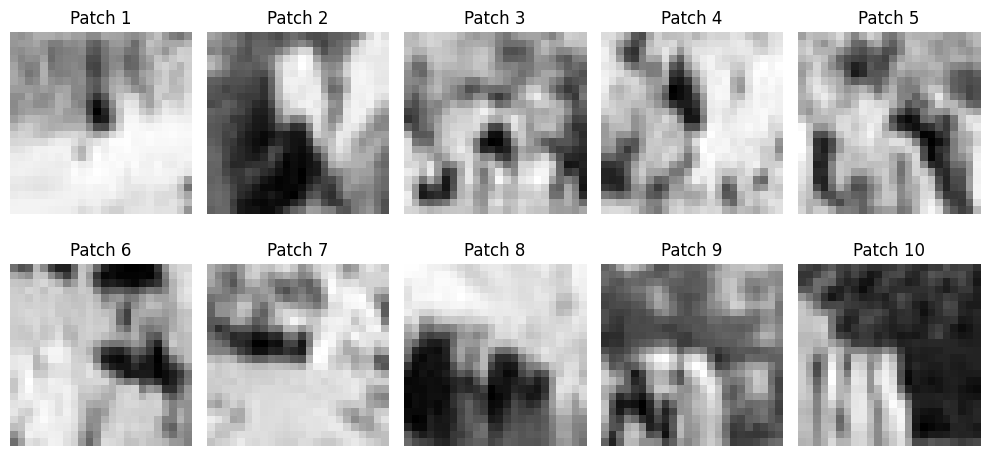

In [7]:
image_gray2,coords2,corner_response2 = detect_corner(image2,min_distance=18)
keypoints2 = find_key_points(image_gray2,coords2,corner_response2)

### Step 2 : SIFT 

Optionally, compute SIFT descriptors (check cv2.FeatureDetector_create() in opencv v2.x
or cv2.xfeatures2d.SIFT_create() in opencv v3.x, version in which you will need the
opencv_contrib package) on the resulted key-points from Harris corner detector.

In [8]:
def apply_SIFT(image,keypoints):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.compute(gray_image, keypoints)
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

    print("descriptor for the first keypoint:", descriptors[0])

    image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6, 6))
    plt.imshow(image_with_keypoints_rgb)
    plt.title('Image with Keypoints')
    plt.axis('off')
    plt.show()

    return keypoints, descriptors

descriptor for the first keypoint: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  57.
 242.   1.   0.   0.   0.   0.   0.  59. 242.   5.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  13. 242.  77.   0.   0.   0.   0.   0.  14. 242. 121.
   4.   0.]


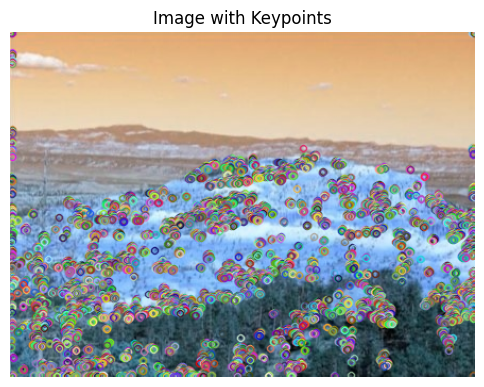

In [9]:
keypoints,descriptors = apply_SIFT(image,keypoints)

descriptor for the first keypoint: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  91. 199.
   0.   0.   0.   0.   0.   0. 199. 199.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  31. 199.  98.   0.   0.   0.   0.   0. 199. 199.  69.   0.
   0.   0.]


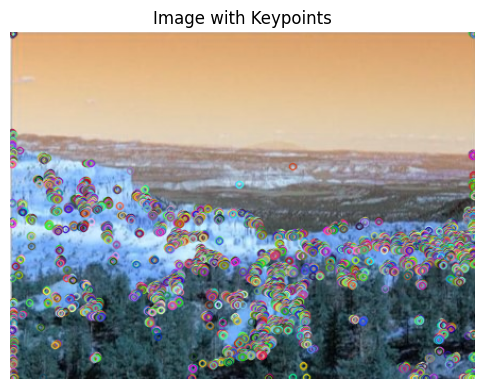

In [10]:
keypoints2, descriptors2 = apply_SIFT(image2,keypoints2)

### STEP 3 : 
Compute the distances between every descriptor in image 1 with every descriptor in
image 2. For this, use: a) Normalized correlation and b) Euclidean distance after
normalizing each descriptor.

In [11]:
# Normalize each descriptor
norm_descriptors_img1 = cv2.normalize(descriptors, None, norm_type=cv2.NORM_L2)
norm_descriptors_img2 = cv2.normalize(descriptors2, None, norm_type=cv2.NORM_L2)

# Compute distances using normalized correlation
correlation_distances = np.dot(norm_descriptors_img1, norm_descriptors_img2.T)

# Compute distances using Euclidean distance after normalizing each descriptor
euclidean_distances = np.sqrt(np.sum((norm_descriptors_img1[:, np.newaxis, :] - norm_descriptors_img2[np.newaxis, :, :]) ** 2, axis=-1))

# Print the shape of the computed distances matrices
print("Shape of correlation distances matrix:", correlation_distances.shape)
print("Shape of Euclidean distances matrix:", euclidean_distances.shape)

Shape of correlation distances matrix: (8936, 5676)
Shape of Euclidean distances matrix: (8936, 5676)
